# Jupyter Notebook to test our code.

In [5]:
#require "jupyter-archimedes"

/home/austinw/.opam/cs3110-2021sp/lib/ocaml/unix.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/bigarray.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/cairo2: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/cairo2/cairo.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/dynlink.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/camlp4: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/archimedes: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_internals.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_toploop.cma: loaded


Cannot find file graphics.cma.
Cannot find file archimedes_graphics.cma.


Module Archimedes loaded and aliased as A.
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_cairo.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/bytes: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/base64: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/base64/base64.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/compiler-libs: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/compiler-libs/ocamlcommon.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/result: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/result/result.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving/runtime: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving/runtime/ppx_deriving_runtime.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving_yojson/runtime: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving_yojson/runtime/ppx_deriving_yojson_runtime.cma: loaded
/home/austinw/.opam/cs

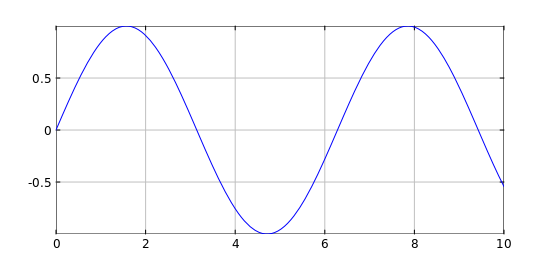

- : unit = ()


In [14]:
let vp = A.init ~w:560. ~h:260. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.blue ;
A.fx vp sin 0.0 10.0 ;
A.close vp

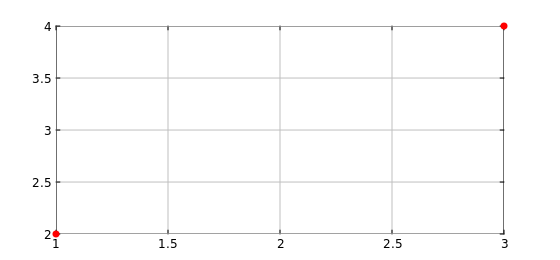

- : unit = ()


In [20]:
let vp = A.init ~w:560. ~h:260. ["jupyter"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.List.xy_pairs vp [(1.0,2.0); (3.0,4.0)] ; (* Plot a random walk of 1000 points. *)
A.close vp

In [11]:
#require "Csv"

No such package: Csv


In [11]:
let sum x = List.fold_left (fun x y -> x +. y) 0. x

let mean x =
  let len = Float.of_int (List.length x) in
  sum x /. len

let round x = floor (x +. 0.5)

let percentile x perc =
  let p = perc /. 100. in
  let sorted_x = List.sort compare x in
  let len = List.length x in
  let index = p *. float_of_int (len - 1) in
  let trun_i = int_of_float index in
  let delta = index -. float_of_int trun_i in
  if len = 0 then 0.
  else if trun_i = len - 1 then List.nth sorted_x trun_i
  else
    ((1. -. delta) *. List.nth sorted_x trun_i)
    +. (delta *. List.nth sorted_x (trun_i + 1))

let median x = percentile x 50.

let q1 x = percentile x 25.

let q3 x = percentile x 75.

let var x =
  let mean_x = mean x in
  let deviations =
    List.map (fun e -> (e -. mean_x) *. (e -. mean_x)) x
  in
  mean deviations

let std x = Float.sqrt (var x)

val sum : float list -> float = <fun>


val mean : float list -> float = <fun>


val round : float -> float = <fun>


val percentile : float list -> float -> float = <fun>


val median : float list -> float = <fun>


val q1 : float list -> float = <fun>


val q3 : float list -> float = <fun>


val var : float list -> float = <fun>


val std : float list -> float = <fun>


In [150]:
type dataframe = {
    header : string list;
    data : string list list;
}

type dataframe = { header : string list; data : string list list; }


In [151]:
let loadfile file_name = 
    let x = file_name 
    |> Csv.load 
    |> Csv.trim 
    |> Csv.square in
    let head, dat = 
        match x with 
        | h :: d -> h, Csv.transpose d 
        | [] -> assert false in
        { header = head; data = dat }

val loadfile : string -> dataframe = <fun>


In [152]:
let x = loadfile "quartet.csv"

val x : dataframe =
  {header = ["x1"; "y1"; "x2"; "y2"; "x3"; "y3"; "x4"; "y4"];
   data =
    [["10"; "8"; "13"; "9"; "11"; "14"; "6"; "4"; "12"; "7"; "5"];
     ["8.04"; "6.95"; "7.58"; "8.81"; "8.33"; "9.96"; "7.24"; "4.26";
      "10.84"; "4.82"; "5.68"];
     ["10"; "8"; "13"; "9"; "11"; "14"; "6"; "4"; "12"; "7"; "5"];
     ["9.14"; "8.14"; "8.74"; "8.77"; "9.26"; "8.1"; "6.13"; "3.1"; "9.13";
      "7.26"; "4.74"];
     ["10"; "8"; "13"; "9"; "11"; "14"; "6"; "4"; "12"; "7"; "5"];
     ["7.46"; "6.77"; "12.74"; "7.11"; "7.81"; "8.84"; "6.08"; "5.39";
      "8.15"; "6.42"; "5.73"];
     ["8"; "8"; "8"; "8"; "8"; "8"; "8"; "19"; "8"; "8"; "8"];
     ["6.58"; "5.76"; "7.71"; "8.84"; "8.47"; "7.04"; "5.25"; "12.5"; "5.56";
      "7.91"; "6.89"]]}


In [202]:
let save_df df file_name = 
    Csv.save file_name (df.header :: (Csv.transpose df.data))

val save_df : dataframe -> string -> unit = <fun>


In [153]:
let print_df df = 
    Csv.print_readable (df.header :: (Csv.transpose df.data));
    print_endline "";

val print_df : dataframe -> unit = <fun>


In [154]:
print_df x

x1 y1    x2 y2   x3 y3    x4 y4
10 8.04  10 9.14 10 7.46  8  6.58
8  6.95  8  8.14 8  6.77  8  5.76
13 7.58  13 8.74 13 12.74 8  7.71
9  8.81  9  8.77 9  7.11  8  8.84
11 8.33  11 9.26 11 7.81  8  8.47
14 9.96  14 8.1  14 8.84  8  7.04
6  7.24  6  6.13 6  6.08  8  5.25
4  4.26  4  3.1  4  5.39  19 12.5
12 10.84 12 9.13 12 8.15  8  5.56
7  4.82  7  7.26 7  6.42  8  7.91
5  5.68  5  4.74 5  5.73  8  6.89



- : unit = ()


In [155]:
let get_encodings string_lst = 
    let uniques = string_lst 
    |> List.map (fun x -> String.lowercase_ascii x) 
    |> List.sort_uniq compare in  
    let len = List.length uniques in 
    let one_to_n = List.init len (fun x -> float_of_int (x + 1)) in
    List.combine uniques one_to_n  

val get_encodings : string list -> (string * float) list = <fun>


In [156]:
let encode string_lst = 
    let pairs = get_encodings string_lst in 
    let lowercase_lst = List.map 
        (fun x -> String.lowercase_ascii x) string_lst in 
    List.map (fun x -> List.assoc x pairs) lowercase_lst

val encode : string list -> float list = <fun>


In [196]:
let string_to_float lst_of_str_lst = 
    let clean_up lst = 
        try List.map (fun x -> float_of_string x) lst
        with _ -> encode lst
    in
    List.map (fun x -> clean_up x) lst_of_str_lst

val string_to_float : string list list -> float list list = <fun>


In [157]:
let cols_to_float df = 
    let clean_up lst = 
        try List.map (fun x -> float_of_string x) lst
        with _ -> encode lst
    in
    List.map (fun x -> clean_up x) df.data 

val cols_to_float : dataframe -> float list list = <fun>


In [158]:
let pre_process df = 
    let clean_up lst = List.map 
        (fun x -> string_of_float x) lst in
    let u_data = List.map 
        (fun x -> clean_up x) (cols_to_float df) in
    { df with data = u_data }

val pre_process : dataframe -> dataframe = <fun>


In [160]:
let rec find_index x lst = 
  match lst with 
  | [] -> failwith "Not found"
  | h :: t -> if h = x then 0 else find_index x t + 1

val find_index : 'a -> 'a list -> int = <fun>


In [161]:
let indices_from_col_lst df col_lst = 
    List.map (fun x -> find_index x df.header) col_lst 

val indices_from_col_lst : dataframe -> string list -> int list = <fun>


In [162]:
let rename_cols df lst_to_rename updated_lst = 
    let u_header = List.map (fun x -> 
        if List.mem x lst_to_rename then
            let index = find_index x lst_to_rename in
            List.nth updated_lst index
        else 
            x) df.header in
    { df with header = u_header }

val rename_cols : dataframe -> string list -> string list -> dataframe =
  <fun>


In [ ]:
let rename_cols_i df lst_to_rename updated_lst = 
    let u_header = List.map (fun x -> 
        if List.mem x lst_to_rename then
            let index = find_index x lst_to_rename in
            List.nth updated_lst index
        else 
            x) df.header in
    { df with header = u_header }

In [167]:
let select_cols_helper df indices = 
    let u_header = List.filteri 
        (fun i x -> List.mem i indices) df.header in 
    let u_data = List.filteri 
        (fun i x -> List.mem i indices) df.data in
    { header = u_header; data = u_data }
    
let select_cols df col_lst = 
    let indices = indices_from_col_lst df col_lst in
    select_cols_helper df indices

let select_cols_i df indices = 
    select_cols_helper df indices

val select_cols_helper : dataframe -> int list -> dataframe = <fun>


val select_cols : dataframe -> string list -> dataframe = <fun>


val select_cols_i : dataframe -> int list -> dataframe = <fun>


In [204]:
let filter_helper df index f = 
    let column = List.nth df.data index in 
    let indices = List.mapi 
        (fun i x -> if f x then i else -1) column
        |> List.filter (fun x -> x <> -1) in
    let u_data = List.map 
        (fun x -> List.filteri
            (fun i y -> List.mem i indices) x) df.data in
    { df with data = u_data }
    
let filter df col f = 
    let index = find_index col df.header in 
    filter_helper df index f

let filter_i df index f = 
    filter_helper df index f

val filter_helper : dataframe -> int -> (string -> bool) -> dataframe = <fun>


val filter : dataframe -> string -> (string -> bool) -> dataframe = <fun>


val filter_i : dataframe -> int -> (string -> bool) -> dataframe = <fun>


In [205]:
let update_helper df index f new_value = 
    let column = List.nth df.data index in 
    let indices = List.mapi 
        (fun i x -> if f x then i else -1) column
        |> List.filter (fun x -> x <> -1) in
    let u_data = List.map 
        (fun x -> List.filteri
            (fun i y -> List.mem i indices) new_value) df.data in
    { df with data = u_data }

let udpate df col f new_value = 
    let index = find_index col df.header in 
    update_helper df index f new_value

let update_i df index f new_value = 
    update_helper df index f new_value

val update_helper :
  dataframe -> int -> (string -> bool) -> string list -> dataframe = <fun>


val udpate :
  dataframe -> string -> (string -> bool) -> string list -> dataframe = <fun>


val update_i :
  dataframe -> int -> (string -> bool) -> string list -> dataframe = <fun>


In [191]:
let get_x_y df x_lst y = 
    let u_df = pre_process df in 
    let x = (select_cols u_df x_lst).data in
    let index = find_index y u_df.header in 
    let y = List.map (fun x -> float_of_string x) (List.nth u_df.data index) in
    (x, y)

val get_x_y :
  dataframe -> string list -> string -> string list list * float list = <fun>


In [198]:
let train_test_split df x y test_percent = 
    let x, y = get_x_y df x y in 
    if test_percent >= 1. then failwith "Make sure the test_percent < 1"
    else
    
        let split_i = int_of_float 
          (float_of_int (List.length y) -. 
          (float_of_int (List.length y) /. (1. /. test_percent))) in
          
        let x_as_rows = Csv.transpose x in 
        let x_train = x_as_rows
        |> List.filteri (fun i x -> i <= split_i)
        |> Csv.transpose
        |> string_to_float in
        let x_test = x_as_rows
        |> List.filteri (fun i x -> i > split_i) 
        |> Csv.transpose
        |> string_to_float in        
        
        let y_train = List.filteri (fun i x -> i <= split_i) y in
        let y_test = List.filteri (fun i x -> i > split_i) y in
        (x_train, x_test, y_train, y_test)

val train_test_split :
  dataframe ->
  string list ->
  string ->
  float -> float list list * float list list * float list * float list =
  <fun>


In [200]:
train_test_split x ["x1"; "x2"; "x3"] "y1" 0.3

- : float list list * float list list * float list * float list =
([[10.; 8.; 13.; 9.; 11.; 14.; 6.; 4.]; [10.; 8.; 13.; 9.; 11.; 14.; 6.; 4.];
  [10.; 8.; 13.; 9.; 11.; 14.; 6.; 4.]],
 [[12.; 7.; 5.]; [12.; 7.; 5.]; [12.; 7.; 5.]],
 [8.04; 6.95; 7.58; 8.81; 8.33; 9.96; 7.24; 4.26], [10.84; 4.82; 5.68])


In [201]:
let split_with_cross_val df x y test_percent cross_percent = 
  let x, y = get_x_y df x y in 
  if cross_percent +. test_percent >= 1. then 
    failwith "Make sure test_percent and cross_percent amount to less than 1"
  else
  
    let split_cr = int_of_float 
      (float_of_int (List.length y) -. 
      (float_of_int (List.length y) /. 
      (1. /. (cross_percent +. test_percent)))) in
    let split_test = int_of_float 
      (float_of_int (List.length y) -. 
      (float_of_int (List.length y) /. 
      (1. /. test_percent))) in
      
    let x_as_rows = Csv.transpose x in 
    let x_validation = x_as_rows
        |> List.filteri (fun i x -> i > split_cr && i <= split_test)
        |> Csv.transpose
        |> string_to_float in
    let x_train = x_as_rows
        |> List.filteri (fun i x -> i <= split_cr)
        |> Csv.transpose
        |> string_to_float in
    let x_test = x_as_rows
        |> List.filteri (fun i x -> i > split_test)
        |> Csv.transpose
        |> string_to_float in
        
    let y_validation = List.filteri (fun i x -> 
      i > split_cr && i <= split_test) y in
    let y_train = List.filteri (fun i x -> i <= split_cr) y in
    let y_test = List.filteri (fun i x -> i > split_test) y in
    
    (x_train, x_validation, x_test, y_train, y_validation, y_test)

val split_with_cross_val :
  dataframe ->
  string list ->
  string ->
  float ->
  float ->
  float list list * float list list * float list list * float list *
  float list * float list = <fun>
